In [1]:

from keras.models import load_model


model = load_model("comedy_vgg_100_2_2_72.h5")

/home/smadar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/smadar/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/home/smadar/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))


# Evaluate the NN model
get y_pred and y_true

### model parameters:
1. 1 epoch
2. 100 batch size
3. 10 validation size
4. trainable layer false - 2 last ones
5. name - 'v4 the best'
6. weights-'imagenet'


In [2]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
import pickle
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, classification_report, roc_curve, f1_score
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature


In [15]:
# dimensions of our images
img_width, img_height = 224, 224

# predicting images
WORKING_DIR = os.getcwd()
WORKING_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(WORKING_DIR))))


comedy_file = os.path.join(WORKING_DIR, "_Data/splits/Comedy/test/Comedy")
other_file = os.path.join(WORKING_DIR, "_Data/splits/Comedy/test/0_other")
other_files = [os.path.join(other_file, file) for file in os.listdir(other_file)]
comedy_files = [os.path.join(comedy_file, file) for file in os.listdir(comedy_file)]

all_files = other_files + comedy_files
y_pred = []
y_pred_proba = []

images = np.empty((1, img_width, img_height, 3))
for file in tqdm(all_files):    
    img = image.load_img(file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#     print(x.shape)
#     images = np.vstack([images, x])
    y_pred.append(model.predict(x, batch_size=1)[0][1])
#     print(model.predict(x, batch_size=1)[0][0])
#     print(model.predict_classes(x, batch_size=1)[0])
#     y_pred_proba.append(model.predict_proba(x, batch_size=1)[0][1])
    

print(y_pred)




[1.0, 1.0, 9.0564293e-32, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.524332, 1.0, 1.0, 0.99999785, 1.0, 1.0, 1.0, 0.65218925, 1.0, 1.0, 1.0, 0.0, 1.2899642e-25, 1.0, 1.0, 1.0, 3.471011e-11, 1.0, 0.0, 1.0, 0.0, 1.0, 2.881355e-10, 0.9898901, 2.0412005e-17, 1.0, 1.0, 1.0, 1.0, 0.0023849166, 0.019346515, 1.489555e-19, 1.0, 0.0024179076, 1.2248178e-17, 0.9910411, 1.0, 5.7665527e-24, 1.0, 1.0, 1.0, 3.291952e-11, 0.0008087588, 1.0, 1.0, 1.0, 1.0, 1.0065797e-36, 4.3899742e-32, 1.0, 0.99999964, 2.2206923e-34, 1.0, 1.0, 1.0, 1.0, 1.0, 4.814295e-24, 1.0, 1.0559038e-16, 3.0848107e-25, 2.0194925e-38, 1.0, 5.904499e-38, 4.546667e-05, 1.0, 1.0, 1.0, 1.0, 0.99983656, 3.3083188e-18, 1.101684e-15, 1.0, 0.9999994, 2.8163781e-06, 1.0, 1.0, 2.081447e-06, 2.2540205e-07, 1.1573809e-31, 1.0, 2.170866e-10, 9.748988e-17, 2.8344123e-06, 1.0, 0.000435933, 3.5283202e-12, 1.0, 3.6155362e-30, 1.0, 3.0276965e-25, 1.0, 0.0024612013, 1.0, 1.0, 1.0, 4.1905467e-05, 2.6805273e-11, 7.7981513e-22, 1.0, 4.3597243e-05, 1.0, 1

save the y_pred as pickle (because it takes time)
* **important note:** comedy is 1 and other is 0!

In [16]:
with open('y_comedy_vgg.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(y_pred, f, pickle.HIGHEST_PROTOCOL)
# with open('y_pred_proba_comedy.pickle', 'wb') as f:
#     pickle.dump(y_pred_proba, f, pickle.HIGHEST_PROTOCOL)

In [17]:
y_true = [0] * len(other_files) + [1] * len(comedy_files)
# y_true

# Precision recall

In [12]:
# y_pred_proba

(0.0, 1.0)

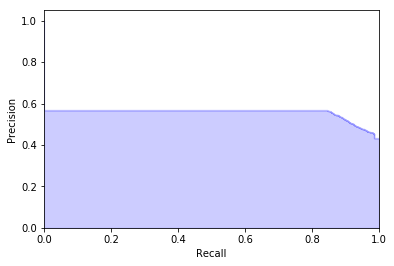

In [22]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


# ROC curve

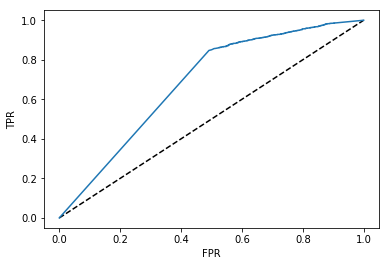

In [19]:
fpr, tpr, th = roc_curve(y_true, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC comedy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [25]:
for i, j in zip(tpr, th):
    print ('fpr', j, 'tg', i)

fpr 2.0 tg 0.0
fpr 1.0 tg 0.8472038749449582
fpr 0.9999999 tg 0.8507265521796565
fpr 0.99999976 tg 0.8533685601056803
fpr 0.99999964 tg 0.8551298987230295
fpr 0.9999995 tg 0.8560105680317041
fpr 0.9999994 tg 0.8560105680317041
fpr 0.9999993 tg 0.8564509026860414
fpr 0.99999917 tg 0.8568912373403786
fpr 0.99999905 tg 0.8568912373403786
fpr 0.9999989 tg 0.8568912373403786
fpr 0.9999988 tg 0.8568912373403786
fpr 0.9999987 tg 0.857331571994716
fpr 0.99999857 tg 0.857331571994716
fpr 0.9999981 tg 0.857331571994716
fpr 0.999998 tg 0.8577719066490532
fpr 0.99999774 tg 0.8577719066490532
fpr 0.9999976 tg 0.8582122413033906
fpr 0.9999975 tg 0.8586525759577279
fpr 0.9999974 tg 0.8586525759577279
fpr 0.99999714 tg 0.8586525759577279
fpr 0.99999595 tg 0.8586525759577279
fpr 0.9999958 tg 0.8590929106120652
fpr 0.99999547 tg 0.8590929106120652
fpr 0.99999475 tg 0.8590929106120652
fpr 0.9999938 tg 0.8590929106120652
fpr 0.9999933 tg 0.8590929106120652
fpr 0.9999932 tg 0.8595332452664025
fpr 0.9999929

# choose threshold

In [29]:
THRESHOLD = 0.5
y_th = [ 1 if x > THRESHOLD else 0 for x in y_pred ]
print(y_th)

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 

In [30]:
print(classification_report(y_true, y_th))

              precision    recall  f1-score   support

           0       0.83      0.41      0.55      3000
           1       0.53      0.89      0.67      2271

   micro avg       0.62      0.62      0.62      5271
   macro avg       0.68      0.65      0.61      5271
weighted avg       0.70      0.62      0.60      5271



# Load again

In [28]:
file = open("y_pred_proba_comedy.pickle",'rb')
y_pred_proba = pickle.load(file)
file.close()
print(len(y_true))
print(len(y_pred_proba))


6631
6631


In [29]:
print(y_pred_proba)

[0.0, 3.3418614e-37, 0.00021330874, 0.0, 0.0, 8.087376e-17, 4.9185156e-10, 0.0, 0.0, 1.0, 0.0, 1.0, 0.61101824, 0.0, 0.0, 7.6944565e-07, 0.0, 1.0, 0.0, 4.3672137e-22, 0.0, 1.6826338e-20, 1.0, 1.6086586e-08, 0.0, 1.0309345e-05, 0.9999994, 0.9999254, 1.00659e-16, 1.0, 0.9999902, 3.3650158e-06, 0.99923337, 0.0, 0.99985814, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.9999411, 1.0, 0.0, 0.0, 1.7557439e-38, 4.266648e-30, 2.5545727e-38, 2.555845e-08, 0.5675065, 3.4647446e-35, 1.0, 0.0, 1.0, 8.101063e-15, 0.0, 0.0, 0.048831504, 0.0, 1.3109841e-16, 2.4546629e-11, 5.357331e-13, 0.0, 0.0, 3.6250847e-27, 1.0, 0.0, 1.0, 0.0, 1.0, 2.7228046e-09, 8.530679e-05, 0.13031484, 5.192412e-10, 0.99911267, 3.4945121e-38, 1.0, 0.9867024, 1.0, 7.7830864e-10, 9.5043385e-35, 2.569036e-38, 2.74801e-20, 2.3515288e-20, 1.1837977e-08, 1.0, 0.0, 0.0, 9.597284e-34, 2.3729314e-34, 1.0, 0.0, 7.66257e-28, 1.0, 1.0, 0.0, 5.124187e-23, 0.0, 0.0, 0.0, 5.077927e-33, 0.0, 2.9551409e-10, 3.052431e-11, 3.546143e-06, 1.042048e-21, 3.7923628e

In [19]:
print(y_true)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [25]:
y_true = [ 0 if x == 1 else 1 for x in y_true ]
y_pred_proba = [ 0 if x == 1 else 1 for x in y_pred_proba ]
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [27]:
print(y_pred_proba)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

(0.0, 1.0)

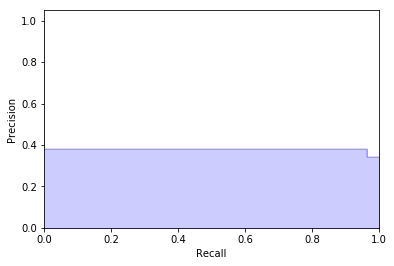

In [26]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [10]:
for th, rec in zip(thresholds, recall):
    th_min = 100
    print(th)
    print(rec)
    if rec > 0.6:
        if th < th_min:
            th_min = th
print(th_min)
        
    

0
1.0
1
0.9652135623073536
1


In [11]:
THRESHOLD = 3.112778e-33
y_th_06 = [ 1 if x > THRESHOLD else 0 for x in y_pred_proba ]
print(y_th_06)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
f1_score(y_true, y_th_06)

0.5469061876247505

In [13]:
precision_score(y_true, y_th_06)

0.3815491731940818

In [14]:
recall_score(y_true, y_th_06)

0.9652135623073536

In [15]:
print(classification_report(y_true, y_th_06))

              precision    recall  f1-score   support

           0       0.91      0.19      0.31      4360
           1       0.38      0.97      0.55      2271

   micro avg       0.45      0.45      0.45      6631
   macro avg       0.65      0.58      0.43      6631
weighted avg       0.73      0.45      0.39      6631

